In [1]:
import pyolite
pyolite.__version__


'0.1.0b2'

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

In [7]:
x = np.linspace(-5, 5, 1000)
y1 = []
for p in x: y1.append(sigmoid(p))
y2 = [] #np.cos(x)
for p in y1: y2.append(p*(1.0-p))

In [62]:
y3 = np.gradient(y1)*100
y4 = np.gradient(y3)*100
y5 = np.gradient(y4)*100
y6 = np.gradient(y5)*100
y7 = np.gradient(y6)*100
y8 = np.gradient(y7)*100

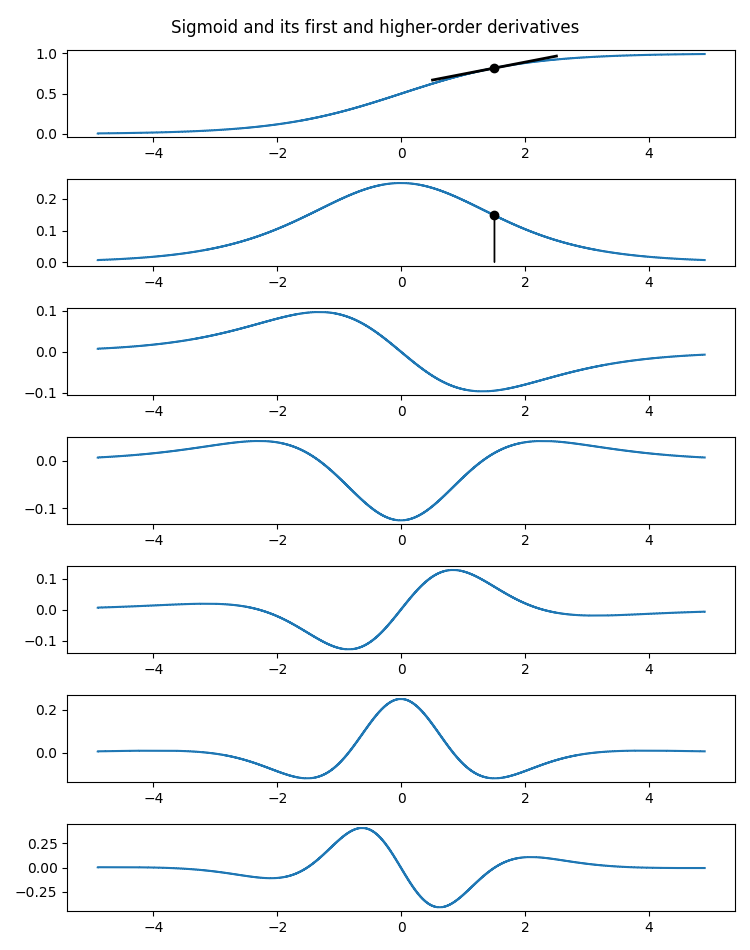

In [100]:
plt.rcParams["figure.figsize"] = [7.50, 9.50]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(7)
fig.suptitle('Sigmoid and its first and higher-order derivatives')
axs[0].plot(x[10:990], y1[10:990], drawstyle="steps")
axs[1].plot(x[10:990], y3[10:990], drawstyle="steps")
axs[2].plot(x[10:990], y4[10:990], drawstyle="steps")
axs[3].plot(x[10:990], y5[10:990], drawstyle="steps")
axs[4].plot(x[10:990], y6[10:990], drawstyle="steps")
axs[5].plot(x[10:990], y7[10:990], drawstyle="steps")
axs[6].plot(x[10:990], y8[10:990], drawstyle="steps")

axs[0].plot(x[650], y1[650], 'o', color='black')
for thex in [650]:
    xs = [x[thex]-1.0,x[thex],x[thex]+1.0]
    ys = [y1[thex]-1.0*y3[thex],y1[thex],y1[thex]+1.0*y2[thex]]
    axs[0].plot(xs, ys, '-', label='line 1', linewidth=2, color='black')
    axs[1].plot(x[thex], y3[thex], 'o', color='black')
    axs[1].arrow(x[thex], 0, 0, y3[thex], color='black')

plt.show()

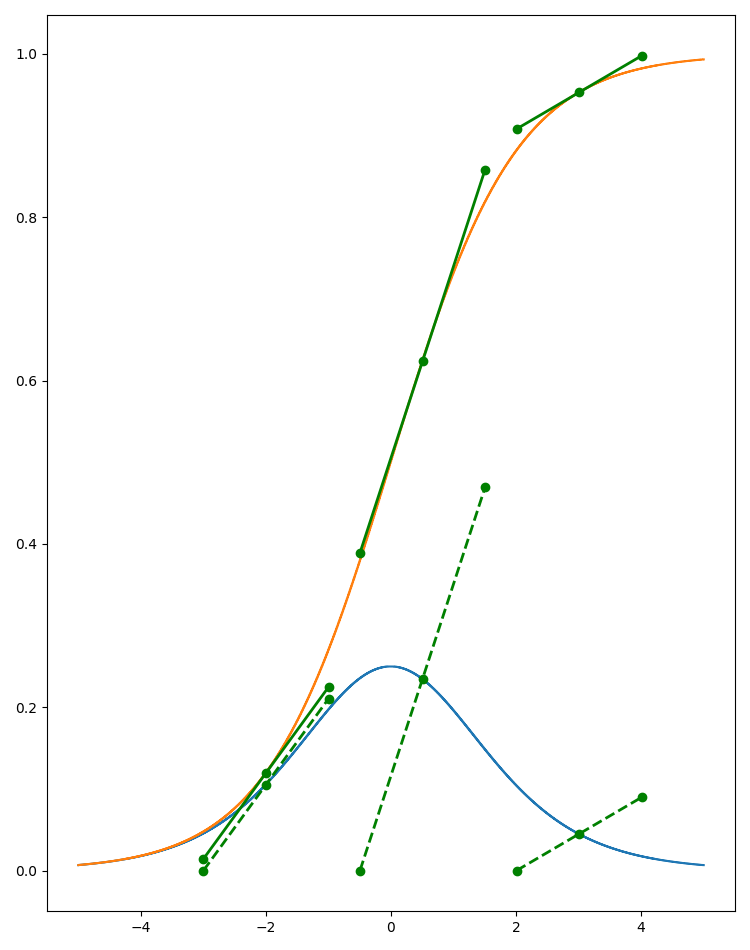

In [90]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#plt.fill_between(x, y1, step="pre", alpha=0.4)

#plt.plot(x, y3, drawstyle="steps")
plt.plot(x, y2, drawstyle="steps")
plt.plot(x, y1, drawstyle="steps")

for thex in [300,550,800]:
    xs = [x[thex]-1.0,x[thex],x[thex]+1.0]
    ys = [y1[thex]-1.0*y2[thex],y1[thex],y1[thex]+1.0*y2[thex]]
    plt.plot(xs, ys, 'go-', label='line 1', linewidth=2)
    plt.plot(xs, [0,y2[thex],2*y2[thex]], 'go--', label='line 1', linewidth=2)
#plt.fill_between(xs, [0,y2[700],2*y2[700]], step="pre", alpha=0.4)

#plt.fill_between(x, y3, step="pre", alpha=0.4)

plt.show()

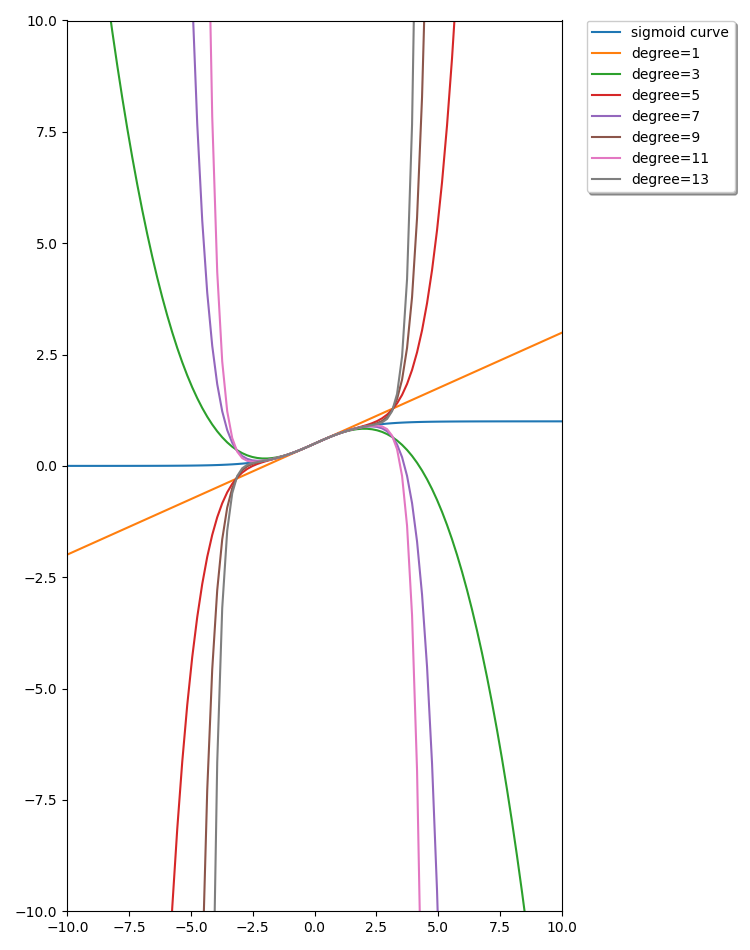

In [115]:
#from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.approximate_taylor_polynomial.html
#JZ: added xstar
import matplotlib.pyplot as plt

from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, sigmoid(x), label="sigmoid curve")

xstar = 0

for degree in np.arange(1, 15, step=2):
    sig_taylor = approximate_taylor_polynomial(sigmoid, xstar, degree, 1,
                                               order=degree + 2)
    plt.plot(x, sig_taylor(x+xstar), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.tight_layout()

plt.axis([-10, 10, -10, 10])

plt.show()

In [112]:
np.exp(2)


7.38905609893065

In [ ]:
import numpy as np
import math 
import sympy
import matplotlib.pyplot as plt

def V(x,y):
    t=[]
    for k in range (1,3): 
        for l in range (1,3):
            t.append(0.000001*np.sin(2*math.pi*k*0.5)/((4*(math.pi)**2)* (k**2+l**2)))  
            term = t* np.sin(2 * math.pi * k * x/0.004) * np.cos(2 * math.pi * l * y/0.004)
            return term 
    return term.sum()

x,y=sympy.symbols('x y')
fun=V(x,y)
gradfun=[sympy.diff(fun,var) for var in (x,y)]
numgradfun=sympy.lambdify([x,y],gradfun)

X,Y=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
graddat=numgradfun(X,Y)
plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]

x_obstacle, y_obstacle = 0.0, 0.0
alpha_obstacle, a_obstacle, b_obstacle = 1.0, 1e3, 2e3

p = -alpha_obstacle * np.exp(-((x - x_obstacle)**2 / a_obstacle
                               + (y - y_obstacle)**2 / b_obstacle))

# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p, np.diff(y[:2, 0]), np.diff(x[0, :2]))

skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
im = ax.imshow(p, extent=[x.min(), x.max(), y.min(), y.max()])
ax.quiver(x[skip], y[skip], dx[skip], dy[skip])

fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()